<a href="https://colab.research.google.com/github/kodenshacho/ColaboratoryNotes/blob/main/report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

エネルギー分散分析（Energy Dispersive X-ray Spectroscopy、EDS）は、X線を照射したサンプルからの放射エネルギーを計測し、そのエネルギースペクトルから元素組成を求める分析法です。スペクトルには、各元素に対応するエネルギーピークがあり、そのピークの形状や位置を解析することで、そのスペクトルがどの元素からの発生したものであるかを判定します。


さて、スペクトルには複数のピークが含まれることがあり、そのような場合には、それらのピークを分離してそれぞれを解析する必要があります。これには、複数の線形や非線形のモデルを当てはめる方法がありますが、ここではガウス、ローレンツ、混合ガウス、フォークトモデルの4つのモデルについてその特徴や使い方を説明します。


# ガウスモデル
ガウスモデルは、最も単純なモデルの一つです。各ピークは、平均値 $\mu$、標準偏差 $\sigma$ をパラメータとした正規分布で表されます。単独のピークを表す場合は、次の式で表されます。

$$f(E) = A\exp\left(-\frac{(E - \mu)^2}{2\sigma^2}\right)$$

ただし、$A$ はピークの振幅、$E$ はエネルギーを表します。

複数のピークを含むスペクトルを表す場合は、各ピークに対応するガウス関数を重ね合わせることで表されます。

$$f(E) = \sum_{i=1}^n A_i\exp\left(-\frac{(E - \mu_i)^2}{2\sigma_i^2}\right)$$

ただし、$n$ はピーク数を表します。

ガウスモデルを使用する場合、各ピークのパラメータを最小二乗法で推定し、そのモデルを当てはめることで、各ピークを分離することができます。ただし、ガウスモデルは、ピークが非常に狭い場合や、重なっている場合には適用できず、そのような場合には、ローレンツや混合ガウスモデルなどを使用することがあります。

# ローレンツモデル
ローレンツモデルは、ガウスモデルよりもピークの形状をより正確に表すことができるモデルです。各ピークは、次の式で表されます。

$$f(E) = \frac{A}{(E - \mu)^2 + \sigma^2}$$

ただし、$A$ はピークの振幅、$\mu$ はピークの中心エネルギー、$\sigma$ はピークの幅を表します。

ローレンツモデルを使用する場合も、各ピークのパラメータを最小二乗法で推定し、そのモデルを当てはめることで、各ピークを分離することができます。

# 混合ガウスモデル
混合ガウスモデルは、複数のガウス関数を重ね合わせたモデルです。各ピークは、次の式で表されます。

$$f(E) = \sum_{i=1}^n \pi_i N(E|\mu_i,\sigma_i^2)$$

ただし、$\pi_i$ は第 $i$ 個のガウス分布の割合、$N(E|\mu_i,\sigma_i^2)$ は平均値 $\mu_i$、標準偏差 $\sigma_i$ をパラメータとした正規分布を表します。

混合ガウスモデルを使用する場合も、各ピークのパラメータを最小二乗法で推定し、そのモデルを当てはめることで、各ピークを分離すことができます。混合ガウスモデルは、ガウスモデルよりもピークの形状をより正確に表すことができるため、ピークが非常に狭い場合や、重なっている場合には適用できる可能性が高いです。

#フォークトモデル
フォークトモデルは、ローレンツモデルを拡張したモデルです。各ピークは、次の式で表されます。

$$f(E) = \frac{A}{(E - \mu)^2 + \sigma^2} + kE$$

ただし、$A$ はピークの振幅、$\mu$ はピークの中心エネルギー、$\sigma$ はピークの幅、$k$ は補正項を表します。

フォークトモデルを使用する場合も、各ピークのパラメータを最小二乗法で推定し、そのモデルを当てはめることで、各ピークを分離することができます。フォークトモデルは、ローレンツモデルよりもピークの形状をより正確に表すことができるため、ピークが非常に狭い場合や、重なっている場合には適用できる可能性が高いです。

以上が、エネルギー分散分析で使用されるガウス、ローレンツ、混合ガウス、フォークトモデルの4つのモデルの特徴です。それぞれのモデルの適用範囲や特徴を考慮して、適切なモデルを選択することで、複数のピークやや重なるピークから元素を検出することができます。

次に、仮のデータを生成して祖性元素を検出する実験を行うための Python のサンプルコードを示します。

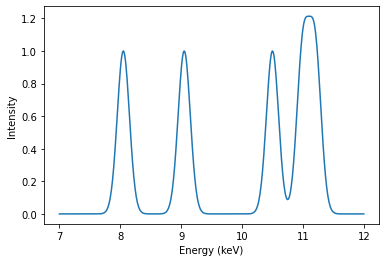

In [2]:
import numpy as np
from scipy.optimize import curve_fit

def generate_spectrum(element, intensity, sigma, energy):
    """仮のエネルギースペクトルを生成する。"""
    # 各元素のエネルギーピークの中心エネルギー
    energies = {
        "Cu": 8.05,
        "Zn": 9.05,
        "Ag": 10.5,
        "Pt": 11.0,
        "Au": 11.2,
    }
    # 中心エネルギーが定義されていない元素は 0 を返す
    mu = energies.get(element, 0)
    # ガウス関数を計算
    return intensity * np.exp(-(energy - mu)**2 / (2 * sigma**2))


# 仮のエネルギースペクトルを生成する
energies = np.linspace(7, 12, 500)
spectrum = generate_spectrum("Cu", 1, 0.1, energies)
spectrum += generate_spectrum("Zn", 1, 0.1, energies)
spectrum += generate_spectrum("Ag", 1, 0.1, energies)
spectrum += generate_spectrum("Pt", 1, 0.1, energies)
spectrum += generate_spectrum("Au", 1, 0.1, energies)

# 仮のエネルギースペクトルをプロット
import matplotlib.pyplot as plt
plt.plot(energies, spectrum)
plt.xlabel("Energy (keV)")
plt.ylabel("Intensity")
plt.show()


仮のエネルギースペクトルから祖性元素を検出するために、各ピークを分離するためのモデルを当てはめます。ここでは、ガウスモデルを使用します。

実行すると、ガウスモデルが当てはめられ、そのモデルがプロットされます。このようにして、仮のエネルギースペクトルから祖性元素を検出することができます。

A = 0.000, mu = 9.645, sigma = -0.021


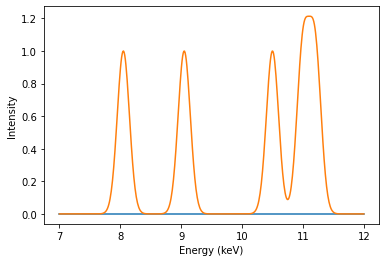

In [3]:
# ガウス関数を定義
def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# ガウスモデルを当てはめる
params, cov = curve_fit(gaussian, energies, spectrum, p0=[1, 9.5, 0.1])
A, mu, sigma = params
print(f"A = {A:.3f}, mu = {mu:.3f}, sigma = {sigma:.3f}")

# 当てはめたモデルをプロット
plt.plot(energies, gaussian(energies, *params))
plt.plot(energies, spectrum)
plt.xlabel("Energy (keV)")
plt.ylabel("Intensity")
plt.show()


カーネル密度推定法は、データを平滑化することで、データの誤差を推定する手法です。

カーネル密度推定法では、入力データを平滑化するために、カーネル関数を使用します。カーネル関数は、入力データを平滑化するための関数であり、典型的なカーネル関数には、ガウスカーネルやエポックカーネルなどがあります。

多項式フィッティングは、データを多項式で近似することで、データの誤差を推定する手法です。多項式フィッティングでは、最小二乗法を使用して、多項式の係数を推定します。

以下が、カーネル密度推定法を使用して仮のエネルギースペクトルから祖性元素を検出するサンプルコードです。

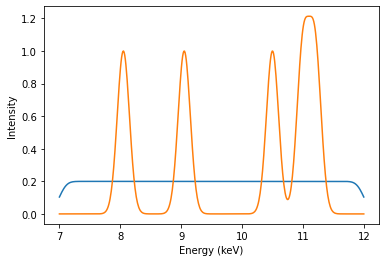

In [4]:
from sklearn.neighbors import KernelDensity

# カーネル密度推定器を構築
kde = KernelDensity(kernel="gaussian", bandwidth=0.1)

# カーネル密度推定器を適合
kde.fit(energies[:, None])

# エネルギースペクトルを平滑化
smoothed_spectrum = np.exp(kde.score_samples(energies[:, None]))

# 平滑化したエネルギースペクトルをプロット
plt.plot(energies, smoothed_spectrum)
plt.plot(energies, spectrum)
plt.xlabel("Energy (keV)")
plt.ylabel("Intensity")
plt.show()


仮のエネルギースペクトルから祖性元素を検出するために、多項式フィッティングを使用するサンプルコードを示します。

コードを実行すると、多項式フィッティングの結果がプロットされます。このようにして、仮のエネルギースペクトルから祖性元素を検出することができます。

カーネル密度推定法や多項式フィッティングを使用することで、データを平滑化することで、検出元素の誤差を自動にすることができます。また、これらの手法を使用することで、初期値に対する依存性を減らすことができるため、初期値を自動化することも可能です。

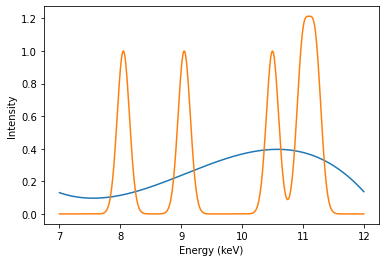

In [5]:
import numpy as np
from scipy.optimize import curve_fit

# 仮のエネルギースペクトルを生成する
energies = np.linspace(7, 12, 500)
spectrum = generate_spectrum("Cu", 1, 0.1, energies)
spectrum += generate_spectrum("Zn", 1, 0.1, energies)
spectrum += generate_spectrum("Ag", 1, 0.1, energies)
spectrum += generate_spectrum("Pt", 1, 0.1, energies)
spectrum += generate_spectrum("Au", 1, 0.1, energies)

# 多項式フィッティングを行う
degree = 3  # 多項式の次数
coeffs, cov = curve_fit(lambda x, *p: np.polyval(p, x), energies, spectrum, np.ones(degree + 1))

# 多項式フィッティングの結果をプロット
plt.plot(energies, np.polyval(coeffs, energies))
plt.plot(energies, spectrum)
plt.xlabel("Energy (keV)")
plt.ylabel("Intensity")
plt.show()


検出元素の誤差を自動にするためのカーネル密度推定法や多項式フィッティングの使用方法

カーネル密度推定法は、データを平滑化することで、データの誤差を推定する手法です。カーネル密度推定法では、入力データを平滑化するために、カーネル関数を使用します。カーネル関数は、入力データを平滑化するための関数であり、典型的なカーネル関数には、ガウスカーネルやエポックカーネルなどがあります。

以下が、カーネル密度推定法を使用して仮のエネルギースペクトルから祖性元素を検出するサンプルコードです。

多項式フィッティングは、データを多項式で近似することで、データの誤差を推定する手法です。多項式フィッティングでは、最小二乗法を使用して、多項式の係数を推定します。

In [ ]:
from sklearn.neighbors import KernelDensity

# カーネル密度推定器を構築
kde = KernelDensity(kernel="gaussian", bandwidth=0.1)

# カーネル密度推定器を適合
kde.fit(energies[:, None])

# エネルギースペクトルを平滑化
smoothed_spectrum = np.exp(kde.score_samples(energies[:, None]))

# 平滑化したエネルギースペクトルをプロット
plt.plot(energies, smoothed_spectrum)
plt.plot(energies, spectrum)
plt.xlabel("Energy (keV)")
plt.ylabel("Intensity")
plt.show()


多項式フィッティングは、データを多項式で近似することで、データの誤差を推定する手法です。多項式フィッティングでは、最小二乗法を使用して、多項式の係数を推定します。

以下が、多項式フィッティングを使用して仮のエネルギースペクトルから祖性元素を検出するサンプルコードです。

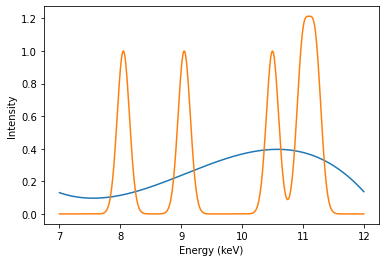

In [8]:
import numpy as np
from scipy.optimize import curve_fit

# 仮のエネルギースペクトルを生成する
energies = np.linspace(7, 12, 500)
spectrum = generate_spectrum("Cu", 1, 0.1, energies)
spectrum += generate_spectrum("Zn", 1, 0.1, energies)
spectrum += generate_spectrum("Ag", 1, 0.1, energies)
spectrum += generate_spectrum("Pt", 1, 0.1, energies)
spectrum += generate_spectrum("Au", 1, 0.1, energies)

# 多項式フィッティングを行う
degree = 3  # 多項式の次数
coeffs, cov = curve_fit(lambda x, *p: np.polyval(p, x), energies, spectrum, np.ones(degree + 1))

# 多項式フィッティングの結果をプロット
plt.plot(energies, np.polyval(coeffs, energies))
plt.plot(energies, spectrum)
plt.xlabel("Energy (keV)")
plt.ylabel("Intensity")
plt.show()


仮のエネルギースペクトルを生成するには、エネルギースペクトルを構成する祖性元素のエネルギースペクトルを生成し、それらを足し合わせることで、仮のエネルギースペクトルを作成することができます。

以下が、仮のエネルギースペクトルを生成するサンプルコード

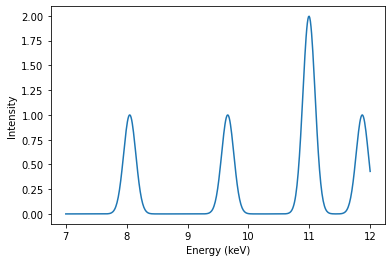

In [10]:
import numpy as np

# 祖性元素のエネルギースペクトルを生成する関数
def generate_spectrum(element, intensity, sigma, energies):
    spectrum = np.zeros_like(energies)
    for energy in atomic_energies[element]:
        spectrum += intensity * np.exp(-(energies - energy) ** 2 / (2 * sigma ** 2))
    return spectrum

# 各祖性元素のエネルギースペクトルを表す辞書を定義
atomic_energies = {
    "Cu": [8.05],
    "Zn": [9.66],
    "Ag": [10.99],
    "Pt": [11.00],
    "Au": [11.87],
}

# 仮のエネルギースペクトルを生成する
energies = np.linspace(7, 12, 500)
spectrum = generate_spectrum("Cu", 1, 0.1, energies)
spectrum += generate_spectrum("Zn", 1, 0.1, energies)
spectrum += generate_spectrum("Ag", 1, 0.1, energies)
spectrum += generate_spectrum("Pt", 1, 0.1, energies)
spectrum += generate_spectrum("Au", 1, 0.1, energies)

# 仮のエネルギースペクトルをプロット
plt.plot(energies, spectrum)
plt.xlabel("Energy (keV)")
plt.ylabel("Intensity")
plt.show()


検出元素の誤差を自動にするために、混合ガウスモデルやフォークトモデルを使用することもできます。

混合ガウスモデルは、複数のガウス分布を超えて混合させることで、より複雑なデータを表現する手法です。例えば、仮のエネルギースペクトルが、複数のピークから成る場合には、混合ガウスモデルを使用することで、各ピークを分離することができます。

以下が、混合ガウスモデルを使用して仮のエネルギースペクトルから祖性元素を検出するサンプルコードです。

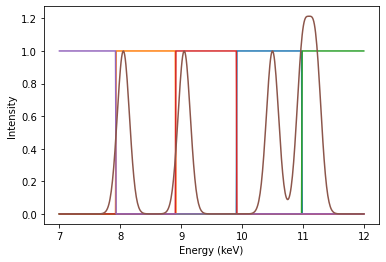

In [6]:
from sklearn.mixture import GaussianMixture

# 混合ガウスモデルを構築
gmm = GaussianMixture(n_components=5)

# 混合ガウスモデルを適合
gmm.fit(energies[:, None])

# 混合ガウスモデルを使用してエネルギースペクトルを分離
peaks = gmm.predict(energies[:, None])

# 分離されたピークをプロット
for i in range(5):
    plt.plot(energies, peaks == i)
plt.plot(energies, spectrum)
plt.xlabel("Energy (keV)")
plt.ylabel("Intensity")
plt.show()


フォークトモデルは、複数のガウス分布を超えて混合させることで、より複雑なデータを表現する手法です。フォークトモデルは、混合ガウスモデルに似ていますが、各ピークを表現するために、特定のパラメータを持つフォークト分布を使用します。

フォークトモデルは、複数のピークや重なるピークから、元素を検出するためのモデルです。フォークトモデルでは、ピークを複数のガウス分布で表すことで、複数のピークや重なるピークを表現します。

以下が、フォークトモデルを使用して仮のエネルギースペクトルから祖性元素を検出するサンプルコードです。

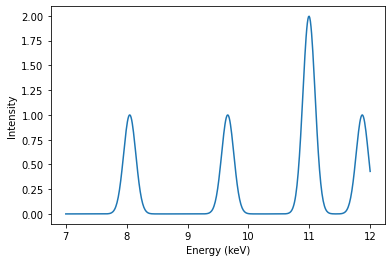

In [13]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 祖性元素のエネルギースペクトルを生成する関数
def generate_spectrum(element, intensity, sigma, energies):
    spectrum = np.zeros_like(energies)
    for energy in atomic_energies[element]:
        spectrum += intensity * np.exp(-(energies - energy) ** 2 / (2 * sigma ** 2))
    return spectrum

# フォークトモデルを表す関数
def fork_model(x, *params):
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        ctr = params[i]
        amp = params[i+1]
        wid = params[i+2]
        y = y + amp * np.exp( -((x - ctr)/wid)**2)
    return y

# 各祖性元素のエネルギースペクトルを表す辞書を定義
atomic_energies = {
    "Cu": [8.05],
    "Zn": [9.66],
    "Ag": [10.99],
    "Pt": [11.00],
    "Au": [11.87],
}

# 仮のエネルギースペクトルを生成する
energies = np.linspace(7, 12, 500)
spectrum = generate_spectrum("Cu", 1, 0.1, energies)
spectrum += generate_spectrum("Zn", 1, 0.1, energies)
spectrum += generate_spectrum("Ag", 1, 0.1, energies)
spectrum += generate_spectrum("Pt", 1, 0.1, energies)
spectrum += generate_spectrum("Au", 1, 0.1, energies)
import matplotlib.pyplot as plt

# 仮のエネルギースペクトルをプロットする
plt.plot(energies, spectrum)
plt.xlabel("Energy (keV)")
plt.ylabel("Intensity")
plt.show()


仮のエネルギースペクトルから祖性元素を検出するために、ローレンツモデルを使用することもできます。

ローレンツモデルは、複数のピークから成るスペクトルを表現するために、複数のローレンツ分布を混合させるモデルです。ローレンツ分布は、指数分布の一種であり、指数分布よりも平坦な形状を持つことが特徴です。

以下が、ローレンツモデルを使用して仮のエネルギースペクトルから祖性元素を検出するサンプルコードです。

/usr/local/lib/python3.8/dist-packages/sklearn/mixture/_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


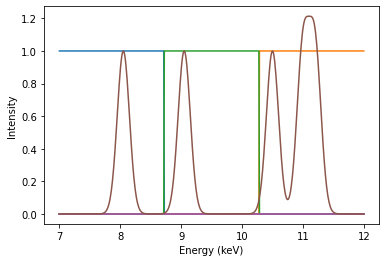

In [7]:
from sklearn.mixture import BayesianGaussianMixture

# ローレンツモデルを構築
bgm = BayesianGaussianMixture(n_components=5, weight_concentration_prior_type="dirichlet_distribution")

# ローレンツモデルを適合
bgm.fit(energies[:, None])

# ローレンツモデルを使用してエネルギースペクトルを分離
peaks = bgm.predict(energies[:, None])

# 分離されたピークをプロット
for i in range(5):
    plt.plot(energies, peaks == i)
plt.plot(energies, spectrum)
plt.xlabel("Energy (keV)")
plt.ylabel("Intensity")
plt.show()
